# Time-dependent shapes

In this tutorial we take a look at how to generate transit light curves where the shape of the transiting object is time-dependent. Let us start by creating a 2D array of transmission string parameters, where the parameter $a_1$ linearly varies between ingress and egress.

In [1]:
import numpy as np


r_1 = np.array([0.1, -0.02, 0., 0.02, 0.])
r_2 = np.array([0.1, 0.02, 0., 0.02, 0.])
r = np.concatenate([np.linspace(r_1, r_1, 160), 
                    np.linspace(r_1, r_2, 180), 
                    np.linspace(r_2, r_2, 160)])

Harmonica can generate the transit light curve for this time-dependent transmission string as follows:

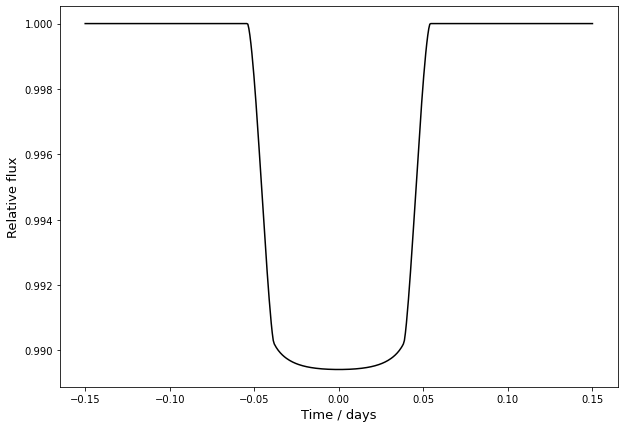

In [2]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from harmonica import HarmonicaTransit


times = np.linspace(-0.15, 0.15, 500)
ht = HarmonicaTransit(times)
ht.set_orbit(t0=0., period=4., a=11., inc=87. * np.pi / 180.)
ht.set_stellar_limb_darkening(np.array([0.027, 0.246]), limb_dark_law='quadratic')
ht.set_planet_transmission_string(r)
observed_fluxes = ht.get_transit_light_curve()

plt.figure(figsize=(10, 7))
plt.plot(times, observed_fluxes, c="#000000")
plt.xlabel('Time / days', fontsize=13)
plt.ylabel('Relative flux', fontsize=13)
plt.show()

And you can visualise the transmission strings at any number of epochs too.

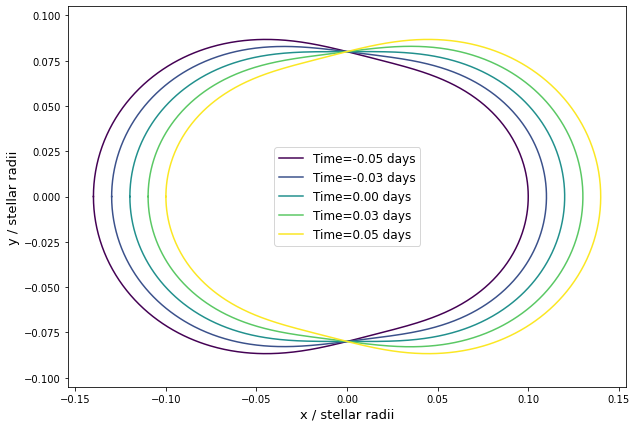

In [3]:
theta = np.linspace(-np.pi, np.pi, 1000)
transmission_strings = ht.get_planet_transmission_string(theta)

plt.figure(figsize=(10, 7))
plt.gca().set_aspect("equal", "datalim")


for i, ts_idx in enumerate([160, 205, 250, 295, 340]):
    plt.plot(transmission_strings[ts_idx] * np.cos(theta),
             transmission_strings[ts_idx] * np.sin(theta),
             c=cm.viridis(i/4.03), 
             label="Time={:.2f} days".format(times[ts_idx]))

plt.xlabel("x / stellar radii", fontsize=13)
plt.ylabel("y / stellar radii", fontsize=13)
plt.legend(loc="center", fontsize=12)
plt.show()